In [1]:
#Importieren Sie Python-Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as nsn 

In [2]:
from sklearn import neighbors
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import sklearn
from math import sqrt

In [3]:
#Lesen Sie den Datensatz
master_data=pd.read_csv("master.csv.xls")

In [4]:
#Print the first 5 rows of the dataframe.
master_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Unnamed: 12,Gender
0,Albania,1987,male,15-24 years,21,312900.0,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,NaN,FEMALE
1,Albania,1987,male,35-54 years,16,308000.0,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,NaN,MALE
2,Albania,1987,female,15-24 years,14,289700.0,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,NaN,FEMALE
3,Albania,1987,male,75+ years,1,21800.0,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,NaN,MALE
4,Albania,1987,male,25-34 years,9,274300.0,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,NaN,MALE


In [8]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27819 non-null  float64
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
 12  Unnamed: 12         0 non-null      float64
 13  Gender              8 non-null      object 
dtypes: float64(4), int64(3), object(7)
memory usage: 3.0+ MB


In [9]:
master_data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),Unnamed: 12
count,27820.000000,27820.000000,2.781900e+04,27820.000000,8364.000000,27820.000000,0.0
mean,2001.258375,242.574407,1.844859e+06,12.816097,0.776601,16866.464414,NaN
std,8.469055,902.047917,3.911835e+06,18.961511,0.093367,18887.576472,NaN
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000,NaN
25%,1995.000000,3.000000,9.750750e+04,0.920000,0.713000,3447.000000,NaN
50%,2002.000000,25.000000,4.302000e+05,5.990000,0.779000,9372.000000,NaN
75%,2008.000000,131.000000,1.486196e+06,16.620000,0.855000,24874.000000,NaN
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000,NaN


In [10]:
master_data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,27820.0,2.001258e+03,8.469055e+00,1985.000,1995.000,2002.000,2008.000,2.016000e+03
suicides_no,27820.0,2.425744e+02,9.020479e+02,0.000,3.000,25.000,131.000,2.233800e+04
population,27819.0,1.844859e+06,3.911835e+06,278.000,97507.500,430200.000,1486195.500,4.380521e+07
suicides/100k pop,27820.0,1.281610e+01,1.896151e+01,0.000,0.920,5.990,16.620,2.249700e+02
HDI for year,8364.0,7.766011e-01,9.336671e-02,0.483,0.713,0.779,0.855,9.440000e-01
gdp_per_capita ($),27820.0,1.686646e+04,1.888758e+04,251.000,3447.000,9372.000,24874.000,1.263520e+05
Unnamed: 12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


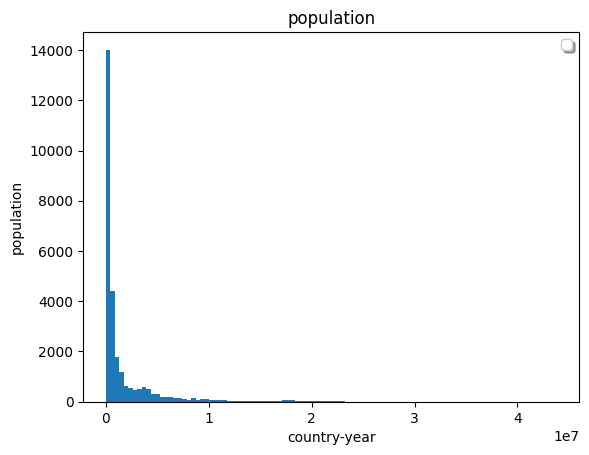

In [14]:
import matplotlib.pyplot as plt
col="population"
plt.hist(master_data[col], bins= 100)
plt.title(col)
plt.xlabel('country-year')
plt.ylabel('population')
plt.show()